# #Part III -- Classification

In [2]:
# Importing required modules-

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pprint

# importing PCA module-
from sklearn.decomposition import PCA

# Importing train_test_split and accuracy_score modules-
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

from sklearn import tree
import collections
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the cleaned data-set after Preprocess-I

pkm = pd.read_csv(r"D:\DMDW project\scripts\Cleaned_data.csv",engine='python')
pkm.head()

,name,generation,is_legendary,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed
0,Bulbasaur,1,0,Grass,Poison,0.7,6.9,318.0,45.0,49.0,49.0,65.0,65.0,45.0
1,Ivysaur,1,0,Grass,Poison,1.0,13.0,405.0,60.0,62.0,63.0,80.0,80.0,60.0
2,Venusaur,1,0,Grass,Poison,2.0,100.0,525.0,80.0,82.0,83.0,100.0,100.0,80.0
3,Mega,1,0,Grass,Poison,2.4,155.5,625.0,80.0,100.0,123.0,122.0,120.0,80.0
4,Charmander,1,0,Fire,Normal,0.6,8.5,309.0,39.0,52.0,43.0,60.0,50.0,65.0


# #Variable Selection
## <>Exploratory Data Analysis (EDA)-

##### Checking correlation between "is_legendary" and other attributes--

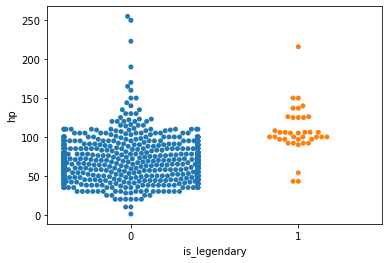

In [3]:
sns.swarmplot(x="is_legendary",y="hp",data=pkm)
plt.show()

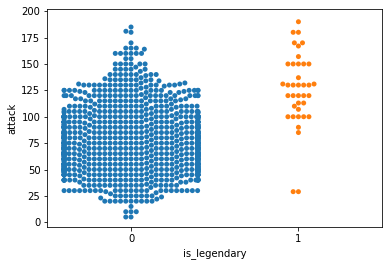

In [4]:
sns.swarmplot(x="is_legendary",y="attack",data=pkm)
plt.show()

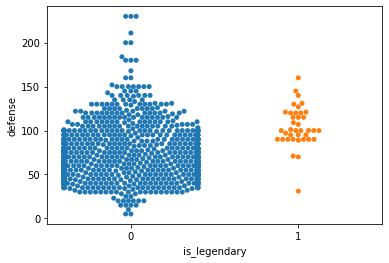

In [5]:
sns.swarmplot(x="is_legendary",y="defense",data=pkm)
plt.show()

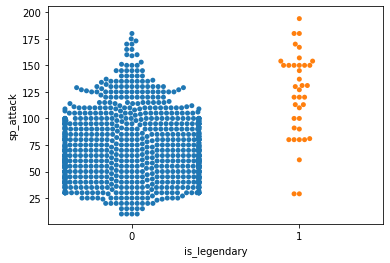

In [6]:
sns.swarmplot(x="is_legendary",y="sp_attack",data=pkm)
plt.show()

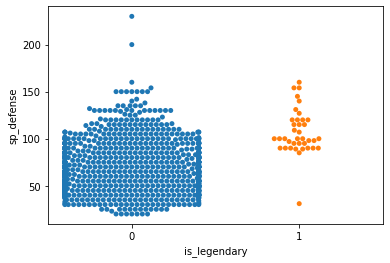

In [7]:
sns.swarmplot(x="is_legendary",y="sp_defense",data=pkm)
plt.show()

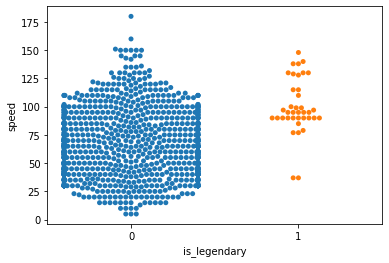

In [8]:
sns.swarmplot(x="is_legendary",y="speed",data=pkm)
plt.show()

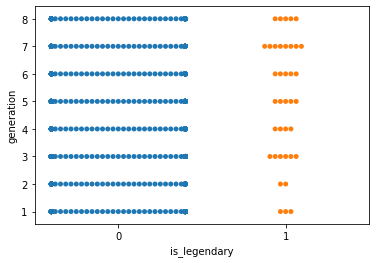

In [9]:
sns.swarmplot(x="is_legendary",y="generation",data=pkm)
plt.show()

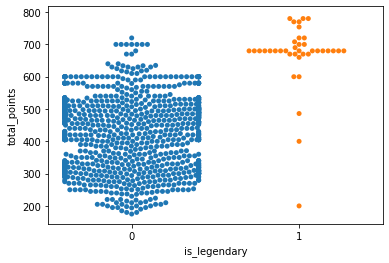

In [10]:
sns.swarmplot(x="is_legendary",y="total_points",data=pkm)
plt.show()

##### From the swarmplots, I dont find strong correlation between either attribute, but "total_points" can show something. So I try to use PCA to reduce the dimension later on.

In [11]:
pkm.head()

,name,generation,is_legendary,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed
0,Bulbasaur,1,0,Grass,Poison,0.7,6.9,318.0,45.0,49.0,49.0,65.0,65.0,45.0
1,Ivysaur,1,0,Grass,Poison,1.0,13.0,405.0,60.0,62.0,63.0,80.0,80.0,60.0
2,Venusaur,1,0,Grass,Poison,2.0,100.0,525.0,80.0,82.0,83.0,100.0,100.0,80.0
3,Mega,1,0,Grass,Poison,2.4,155.5,625.0,80.0,100.0,123.0,122.0,120.0,80.0
4,Charmander,1,0,Fire,Normal,0.6,8.5,309.0,39.0,52.0,43.0,60.0,50.0,65.0


In [4]:
# Dropping unnecessary attributes for classification-

pkm1 = pkm.drop(['name','height_m','weight_kg','generation'],1)

In [13]:
pkm1.head()

,is_legendary,type_1,type_2,total_points,hp,attack,defense,sp_attack,sp_defense,speed
0,0,Grass,Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0
1,0,Grass,Poison,405.0,60.0,62.0,63.0,80.0,80.0,60.0
2,0,Grass,Poison,525.0,80.0,82.0,83.0,100.0,100.0,80.0
3,0,Grass,Poison,625.0,80.0,100.0,123.0,122.0,120.0,80.0
4,0,Fire,Normal,309.0,39.0,52.0,43.0,60.0,50.0,65.0


In [14]:
pkm1.corr()

,is_legendary,total_points,hp,attack,defense,sp_attack,sp_defense,speed
is_legendary,1.000000,0.377968,0.291285,0.278369,0.191782,0.299149,0.249068,0.209727
total_points,0.377968,1.000000,0.636662,0.739658,0.619412,0.737365,0.712201,0.561522
hp,0.291285,0.636662,1.000000,0.446831,0.274824,0.367972,0.371868,0.179563
attack,0.278369,0.739658,0.446831,1.000000,0.452513,0.375180,0.263266,0.379876
defense,0.191782,0.619412,0.274824,0.452513,1.000000,0.221517,0.525728,-0.001194
sp_attack,0.299149,0.737365,0.367972,0.375180,0.221517,1.000000,0.513143,0.441098
sp_defense,0.249068,0.712201,0.371868,0.263266,0.525728,0.513143,1.000000,0.226839
speed,0.209727,0.561522,0.179563,0.379876,-0.001194,0.441098,0.226839,1.000000


# -----------------------------------------------------------------------------------------------------

# # Decision Tree using ID3 --

In [5]:
eps = np.finfo(float).eps
from numpy import log2 as log

In [6]:
# Checking mean of 'hp' attribute
pkm1.hp.mean()

69.40643274853801

In [7]:
# Checking mean of 'total_points' attribute
pkm1.total_points.mean()

436.9337231968811


##### Creating a new attribute "is_powerful" having values 'yes'/'no' based on condition --
 1. 'total_points' >=  450
 2. 'hp' >=  85

In [8]:
pkm1['is_powerful'] = np.where((pkm1['total_points']>=450)&(pkm1['hp']>=85), 'yes', 'no')

In [9]:
pkm1.head()

,is_legendary,type_1,type_2,total_points,hp,attack,defense,sp_attack,sp_defense,speed,is_powerful
0,0,Grass,Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0,no
1,0,Grass,Poison,405.0,60.0,62.0,63.0,80.0,80.0,60.0,no
2,0,Grass,Poison,525.0,80.0,82.0,83.0,100.0,100.0,80.0,no
3,0,Grass,Poison,625.0,80.0,100.0,123.0,122.0,120.0,80.0,no
4,0,Fire,Normal,309.0,39.0,52.0,43.0,60.0,50.0,65.0,no


In [11]:
# Removing non-useful attributes for classification
pkm_classify = pkm1.drop(['is_legendary','type_1','type_2'],1)

In [12]:
pkm_classify

,total_points,hp,attack,defense,sp_attack,sp_defense,speed,is_powerful
0,318.0,45.0,49.0,49.0,65.0,65.0,45.0,no
1,405.0,60.0,62.0,63.0,80.0,80.0,60.0,no
2,525.0,80.0,82.0,83.0,100.0,100.0,80.0,no
3,625.0,80.0,100.0,123.0,122.0,120.0,80.0,no
4,309.0,39.0,52.0,43.0,60.0,50.0,65.0,no
...,...,...,...,...,...,...,...,...
1021,720.0,92.0,170.0,115.0,80.0,115.0,148.0,yes
1022,670.0,92.0,130.0,115.0,80.0,115.0,138.0,yes
1023,720.0,92.0,130.0,145.0,80.0,145.0,128.0,yes
1024,670.0,92.0,130.0,115.0,80.0,115.0,138.0,yes


In [13]:
# Finding entropy value-

entropy_node = 0  #Initialize Entropy
values = pkm_classify.is_powerful.unique()  #Unique objects - 'Yes', 'No'
for value in values:
    fraction = pkm_classify.is_powerful.value_counts()[value]/len(pkm_classify.is_powerful)  
    entropy_node += -fraction*np.log2(fraction)

In [14]:
# Entropy value-
entropy_node

0.7443420190999352

In [15]:
# function {ent} to calculate entropy of each attribute -

def ent(df,attribute):
    target_variables = df.is_powerful.unique()
    variables = df[attribute].unique()    #This gives different features in that attribute


    entropy_attribute = 0
    for variable in variables:
        entropy_each_feature = 0
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df.is_powerful ==target_variable])
            den = len(df[attribute][df[attribute]==variable])
            fraction = num/(den+eps)
            entropy_each_feature += -fraction*log(fraction+eps) #This calculates entropy for one feature
        fraction2 = den/len(df)
        entropy_attribute += -fraction2*entropy_each_feature   #Sums up all the entropy

    return(abs(entropy_attribute))

In [16]:
# storing entropy of each attribute with its name -
a_entropy = {k:ent(pkm_classify,k) for k in pkm_classify.keys()[:-1]}
a_entropy

{'total_points': 0.3789041158353583,
 'hp': 0.07703980051970531,
 'attack': 0.5364683075213914,
 'defense': 0.5424279890789215,
 'sp_attack': 0.5686573587561031,
 'sp_defense': 0.5568151634470552,
 'speed': 0.5908682237697098}

##### Calculate Info gain of each attribute :

#####     IG(attr) = entropy of dataset - entropy of attribute

In [17]:
# Function to calculate IG (infogain)
def ig(e_dataset,e_attr):
    return(e_dataset-e_attr)

#### store IG of each attr in a dict :

In [18]:
# entropy_node = entropy of dataset
# a_entropy[k] = entropy of k(th) attr

IG = {k:ig(entropy_node,a_entropy[k]) for k in a_entropy}

In [19]:
IG

{'total_points': 0.3654379032645769,
 'hp': 0.66730221858023,
 'attack': 0.20787371157854384,
 'defense': 0.2019140300210137,
 'sp_attack': 0.17568466034383212,
 'sp_defense': 0.18752685565288008,
 'speed': 0.15347379533022543}

##### Building the decision tree-

In [20]:
def find_entropy(df):
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    entropy = 0
    values = df[Class].unique()
    for value in values:
        fraction = df[Class].value_counts()[value]/len(df[Class])
        entropy += -fraction*np.log2(fraction)
    return entropy
  
  
def find_entropy_attribute(df,attribute):
  Class = df.keys()[-1]   #To make the code generic, changing target variable class name
  target_variables = df[Class].unique()  #This gives all 'Yes' and 'No'
  variables = df[attribute].unique()    #This gives different features in that attribute
  entropy2 = 0
  for variable in variables:
      entropy = 0
      for target_variable in target_variables:
          num = len(df[attribute][df[attribute]==variable][df[Class] ==target_variable])
          den = len(df[attribute][df[attribute]==variable])
          fraction = num/(den+eps)
          entropy += -fraction*log(fraction+eps)
      fraction2 = den/len(df)
      entropy2 += -fraction2*entropy
  return abs(entropy2)


def find_winner(df):
    Entropy_att = []
    IG = []
    for key in df.keys()[:-1]:
#         Entropy_att.append(find_entropy_attribute(df,key))
        IG.append(find_entropy(df)-find_entropy_attribute(df,key))
    return df.keys()[:-1][np.argmax(IG)]
  
  
def get_subtable(df, node,value):
  return df[df[node] == value].reset_index(drop=True)


def buildTree(df,tree=None): 
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    
    #Here we build our decision tree

    #Get attribute with maximum information gain
    node = find_winner(df)
    
    #Get distinct value of that attribute e.g Salary is node and Low,Med and High are values
    attValue = np.unique(df[node])
    
    #Create an empty dictionary to create tree    
    if tree is None:                    
        tree={}
        tree[node] = {}
    
   #We make loop to construct a tree by calling this function recursively. 
    #In this we check if the subset is pure and stops if it is pure. 

    for value in attValue:
        
        subtable = get_subtable(df,node,value)
        clValue,counts = np.unique(subtable[Class],return_counts=True)                        
        
        if len(counts)==1:#Checking purity of subset
            tree[node][value] = clValue[0]                                                    
        else:        
            tree[node][value] = buildTree(subtable) #Calling the function recursively 
                   
    return tree
  

In [21]:
dt=buildTree(pkm_classify)

##### Printing DT using ID3 -

In [22]:
pprint.pprint(dt)

{'hp': {1.0: 'no',
        10.0: 'no',
        20.0: 'no',
        25.0: 'no',
        28.0: 'no',
        30.0: 'no',
        31.0: 'no',
        35.0: 'no',
        36.0: 'no',
        37.0: 'no',
        38.0: 'no',
        39.0: 'no',
        40.0: 'no',
        41.0: 'no',
        42.0: 'no',
        43.0: 'no',
        44.0: 'no',
        45.0: 'no',
        46.0: 'no',
        47.0: 'no',
        48.0: 'no',
        49.0: 'no',
        50.0: 'no',
        51.0: 'no',
        52.0: 'no',
        53.0: 'no',
        54.0: 'no',
        55.0: 'no',
        56.0: 'no',
        57.0: 'no',
        58.0: 'no',
        59.0: 'no',
        60.0: 'no',
        61.0: 'no',
        62.0: 'no',
        63.0: 'no',
        64.0: 'no',
        65.0: 'no',
        66.0: 'no',
        67.0: 'no',
        68.0: 'no',
        69.0: 'no',
        70.0: 'no',
        71.0: 'no',
        72.0: 'no',
        73.0: 'no',
        74.0: 'no',
        75.0: 'no',
        76.0: 'no',
        77.0: 'no',
 

# ---------------------------------------------------------------------------------------------------------

#  #Principal Component Analysis (PCA)-

#### Using PCA to reduce the dimension-
##### Changing 'yes' value to 1 and 'no' value  to 0

In [23]:
pkmfit=pkm_classify.replace('no',0)
pkmfit=pkmfit.replace('yes',1)

In [24]:
pkmfit

,total_points,hp,attack,defense,sp_attack,sp_defense,speed,is_powerful
0,318.0,45.0,49.0,49.0,65.0,65.0,45.0,0
1,405.0,60.0,62.0,63.0,80.0,80.0,60.0,0
2,525.0,80.0,82.0,83.0,100.0,100.0,80.0,0
3,625.0,80.0,100.0,123.0,122.0,120.0,80.0,0
4,309.0,39.0,52.0,43.0,60.0,50.0,65.0,0
...,...,...,...,...,...,...,...,...
1021,720.0,92.0,170.0,115.0,80.0,115.0,148.0,1
1022,670.0,92.0,130.0,115.0,80.0,115.0,138.0,1
1023,720.0,92.0,130.0,145.0,80.0,145.0,128.0,1
1024,670.0,92.0,130.0,115.0,80.0,115.0,138.0,1


In [25]:
pca = PCA(n_components=pkmfit.shape[1])
fit = pca.fit(pkmfit)

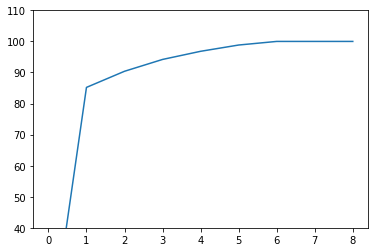

In [26]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1 = np.insert(var1,0,0)
plt.plot(var1)
axes = plt.gca()
axes.set_ylim([40,110])
plt.show()

Based on the ratio, I choose to choose n=3.

##### ##Using pca to transform the dataset in three component scores(c1,c2,c3) as the features used in futural model-

In [27]:
pca = PCA(n_components=3)
fit = pca.fit(pkmfit).transform(pkmfit)
fit1 = pd.DataFrame(fit,columns=['c1','c2','c3'])
df = pd.concat([fit1,pkm1['is_legendary']],axis=1)

In [28]:
print(df)

              c1         c2         c3  is_legendary
0    -127.971838  -4.552862  20.781043             0
1     -34.223860  -5.310044  22.314682             0
2      95.160641  -5.248242  22.509833             0
3     203.924363  18.373035  30.597686             0
4    -138.003208 -22.110411   5.376222             0
...          ...        ...        ...           ...
1021  305.164995  -9.337312 -53.994959             1
1022  250.259454  -5.903392 -24.160880             1
1023  304.130035  25.793188  -6.672252             1
1024  250.259454  -5.903392 -24.160880             1
1025  271.578071 -41.332512  24.313935             1

[1026 rows x 4 columns]



# #Results of Model
### Spliting dataset into train and test

In [29]:
# Making False = 1, True = 0 in 'is_legendary' -
leg = abs((df['is_legendary'].values - 1))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(fit, leg, test_size=0.2, random_state=36)

# --------------------------------------------------------------------------------------------------------

# #Decision Tree

In [31]:
# importing tree & cross_val_score modules-

from sklearn import tree
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(10,30))


# empty list that will hold cross validation scores
cv_scores = []

# perform 10-fold cross validation we are already familiar with
for k in myList:
    clf = tree.DecisionTreeClassifier(max_depth=k)
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

The optimal number of max depth is 16


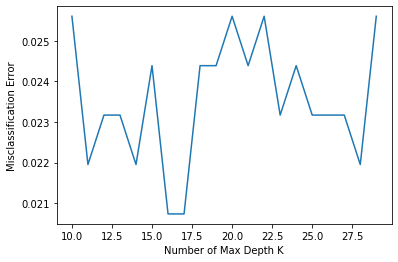

In [32]:
# determining best k
optimal_k = myList[MSE.index(min(MSE))]
print("The optimal number of max depth is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(myList, MSE)
plt.xlabel('Number of Max Depth K')
plt.ylabel('Misclassification Error')
plt.show()

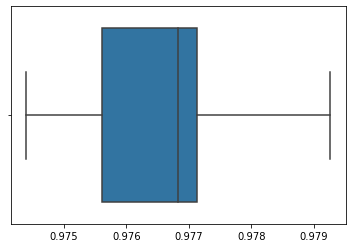

In [33]:
# Box-plot
ax = sns.boxplot(x = cv_scores)
plt.show()


###  #Best Model Confusion Matrix


In [34]:
# Importing confusion_matrix module
from sklearn.metrics import confusion_matrix

clf = tree.DecisionTreeClassifier(max_depth=19)
clf.fit(X_train, y_train) 
y_predict_dt = clf.predict(X_test)
c_df = confusion_matrix(y_test, y_predict_dt)

#### Confusion matrix-

In [35]:
# Confusion matrix--
c_df

array([[  3,   2],
       [  3, 198]], dtype=int64)

### #Accuracy-

In [36]:
score=accuracy_score(y_test,y_predict_dt)

In [37]:
# print(score)
print("The accuracy for the decision tree is %.2f %%" %(score*100))

The accuracy for the decision tree is 97.57 %


# ----------------------------------------------------------------------------------------------------------

## #AdaBoost

In [38]:
# importing AdaBoostClassifier module-
from sklearn.ensemble import AdaBoostClassifier

# creating odd list of K for KNN
myList = list(range(100,1000, 100))


# empty list that will hold cross validation scores
cv_scores = []

# perform 10-fold cross validation we are already familiar with
#n estimators：
for k in myList:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=k)
    scores = cross_val_score(clf, X_train, y_train, cv=20, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

The optimal number of n estimator is 100


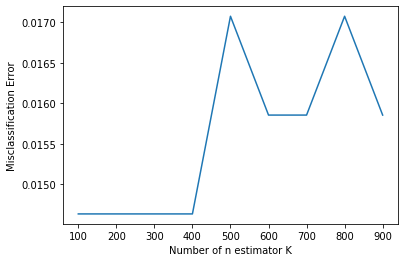

In [39]:
# determining best k
optimal_k = myList[MSE.index(min(MSE))]
print("The optimal number of n estimator is %d" % optimal_k)

# # plot misclassification error vs k
plt.plot(myList, MSE)
plt.xlabel('Number of n estimator K')
plt.ylabel('Misclassification Error')
plt.show()

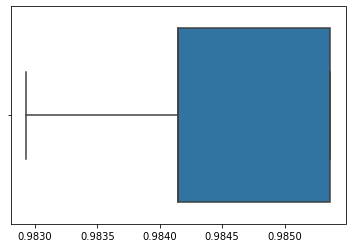

In [40]:
# box-plot
ax = sns.boxplot(x = cv_scores)
plt.show()

###  #Best Model Confusion Matrix

In [41]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=100)
bdt.fit(X_train,y_train)
y_predict_ab = bdt.predict(X_test)

In [42]:
#confusion matrix -
c_ada = confusion_matrix(y_test, y_predict_ab)
c_ada

array([[  3,   2],
       [  2, 199]], dtype=int64)

In [43]:
scoreab=accuracy_score(y_test,y_predict_ab)

In [44]:
# print(scoreab)
print("The accuracy for the after Adaboost is %.2f %%" %(scoreab*100))

The accuracy for the after Adaboost is 98.06 %


# ---------------------------------------------------------------------------------------------------------

# #Constructing the tree

In [45]:
pkm

,name,generation,is_legendary,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed
0,Bulbasaur,1,0,Grass,Poison,0.7,6.9,318.0,45.0,49.0,49.0,65.0,65.0,45.0
1,Ivysaur,1,0,Grass,Poison,1.0,13.0,405.0,60.0,62.0,63.0,80.0,80.0,60.0
2,Venusaur,1,0,Grass,Poison,2.0,100.0,525.0,80.0,82.0,83.0,100.0,100.0,80.0
3,Mega,1,0,Grass,Poison,2.4,155.5,625.0,80.0,100.0,123.0,122.0,120.0,80.0
4,Charmander,1,0,Fire,Normal,0.6,8.5,309.0,39.0,52.0,43.0,60.0,50.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,Zacian,8,1,Fairy,Steel,2.8,355.0,720.0,92.0,170.0,115.0,80.0,115.0,148.0
1022,Zacian,8,1,Fairy,Normal,2.8,110.0,670.0,92.0,130.0,115.0,80.0,115.0,138.0
1023,Zamazenta,8,1,Fighting,Steel,2.9,785.0,720.0,92.0,130.0,145.0,80.0,145.0,128.0
1024,Zamazenta,8,1,Fighting,Normal,2.9,210.0,670.0,92.0,130.0,115.0,80.0,115.0,138.0


In [46]:
# selecting the features
feature_cols = ['total_points','hp','attack','defense','sp_attack','sp_defense','speed']

In [47]:
X = pkm[feature_cols] # Features
y = pkm.is_legendary # Target variable

In [48]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

In [49]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

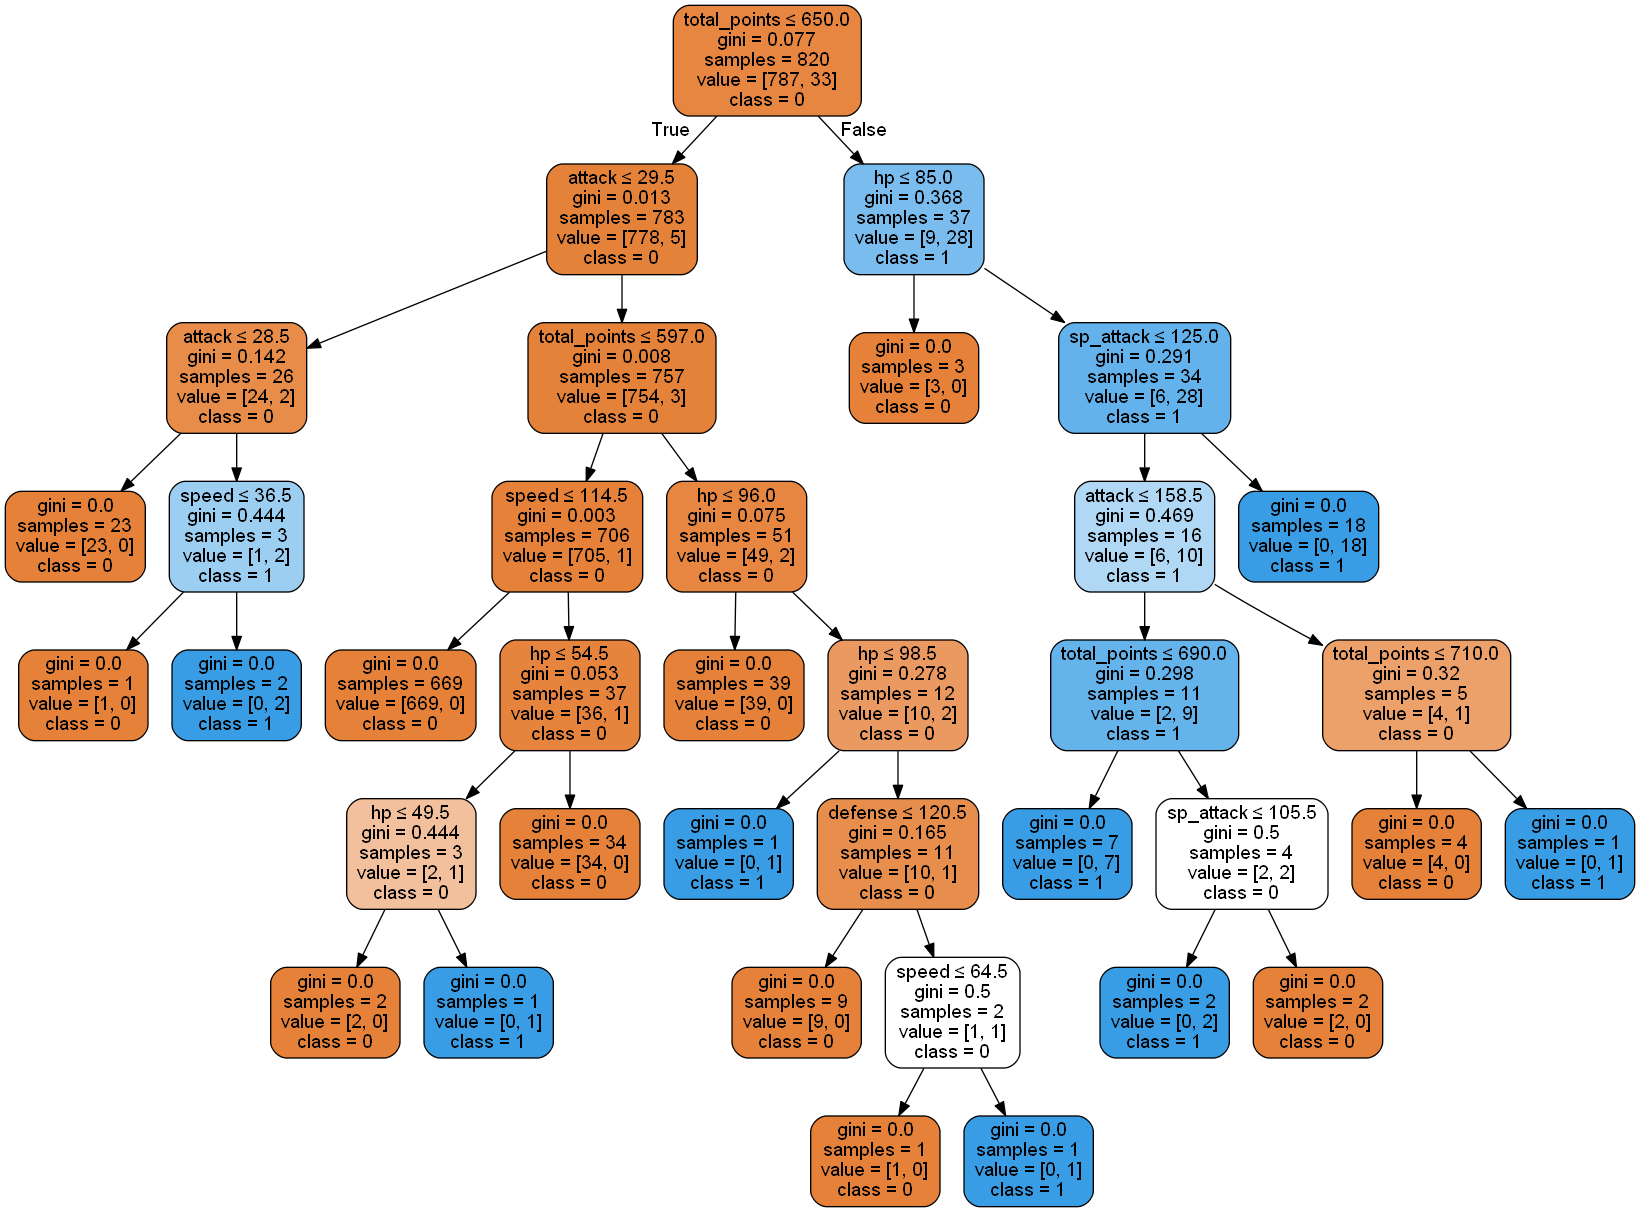

In [50]:
# visualizing the tree using pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())
